<a href="https://colab.research.google.com/github/San-lab-ship/demanda-transporte-urbano/blob/main/predecir_la_demanda_de_pasajeros_en_rutas_urbanas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerías base
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Visualización
import plotly.express as px
import plotly.graph_objects as go
import folium

# Utilidades
import joblib
from datetime import datetime, timedelta
import random


In [ ]:
# Datos simulados de rutas, demanda, clima y eventos
np.random.seed(42)
fechas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
rutas = ['Ruta Norte', 'Ruta Sur', 'Ruta Centro', 'Ruta Este', 'Ruta Oeste']

data = []
for fecha in fechas:
    for ruta in rutas:
        pasajeros = np.random.poisson(lam=random.randint(180, 300))
        clima = np.random.choice(['Soleado', 'Lluvioso', 'Nublado'])
        evento = np.random.choice([0, 1], p=[0.9, 0.1])
        data.append([fecha, ruta, pasajeros, clima, evento])

df = pd.DataFrame(data, columns=['fecha', 'ruta', 'pasajeros', 'clima', 'evento'])
df.head()


,fecha,ruta,pasajeros,clima,evento
0,2024-01-01,Ruta Norte,269,Nublado,0
1,2024-01-01,Ruta Sur,234,Nublado,0
2,2024-01-01,Ruta Centro,257,Nublado,0
3,2024-01-01,Ruta Este,203,Soleado,0
4,2024-01-01,Ruta Oeste,230,Soleado,0


from matplotlib import pyplot as plt
_df_0['pasajeros'].plot(kind='hist', bins=20, title='pasajeros')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('ruta').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('clima').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['evento']
  ys = series['pasajeros']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('evento', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ruta')):
  _plot_series(series, series_name, i)
  fig.legend(title='ruta', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('evento')
_ = plt.ylabel('pasajeros')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['evento']
  ys = series['pasajeros']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('evento', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clima')):
  _plot_series(series, series_name, i)
  fig.legend(title='clima', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('evento')
_ = plt.ylabel('pasajeros')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['evento']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'evento'}, axis=1)
              .sort_values('evento', ascending=True))
  xs = counted['evento']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('evento', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ruta')):
  _plot_series(series, series_name, i)
  fig.legend(title='ruta', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('evento')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['evento']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'evento'}, axis=1)
              .sort_values('evento', ascending=True))
  xs = counted['evento']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('evento', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clima')):
  _plot_series(series, series_name, i)
  fig.legend(title='clima', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('evento')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['pasajeros'].plot(kind='line', figsize=(8, 4), title='pasajeros')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['clima'].value_counts()
    for x_label, grp in _df_8.groupby('ruta')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ruta')
_ = plt.ylabel('clima')

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['ruta'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='pasajeros', y='ruta', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['clima'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='pasajeros', y='clima', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Variables temporales
df['dia_semana'] = df['fecha'].dt.day_name()
df['mes'] = df['fecha'].dt.month
df['pasajeros_lag1'] = df.groupby('ruta')['pasajeros'].shift(1).fillna(df['pasajeros'].mean())
df['media_movil_7'] = df.groupby('ruta')['pasajeros'].transform(lambda x: x.rolling(7, 1).mean())
df['tendencia'] = np.arange(len(df))

# Variables categóricas codificadas
df = pd.get_dummies(df, columns=['ruta', 'clima', 'dia_semana'], drop_first=True)


In [ ]:
# Variables predictoras y objetivo
X = df.drop(columns=['fecha', 'pasajeros'])
y = df['pasajeros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestRegressor(n_estimators=150, max_depth=15, random_state=42)
modelo.fit(X_train, y_train)

# Guardar modelo
joblib.dump(modelo, 'models/modelo_demanda_transporte.pkl')


['models/modelo_demanda_transporte.pkl']

In [ ]:
y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📈 R²: {r2:.4f}")
print(f"📉 MAE: {mae:.2f} pasajeros")
print(f"📊 RMSE: {rmse:.2f} pasajeros")


📈 R²: 0.1131
📉 MAE: 28.80 pasajeros
📊 RMSE: 35.06 pasajeros


In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(y=y_test.values[:200], mode='lines', name='Demanda Real', line=dict(color='royalblue')))
fig1.add_trace(go.Scatter(y=y_pred[:200], mode='lines', name='Demanda Predicha', line=dict(color='orange')))
fig1.update_layout(title='🚍 Demanda Real vs. Predicha (Muestra de 200 días)',
                   xaxis_title='Observaciones', yaxis_title='Pasajeros', template='plotly_dark')
fig1.show()


In [ ]:
importancias = pd.DataFrame({
    'variable': X.columns,
    'importancia': modelo.feature_importances_
}).sort_values('importancia', ascending=False).head(10)

fig2 = px.bar(importancias, x='importancia', y='variable', orientation='h',
              title='🔥 Top 10 Variables Más Relevantes para la Predicción',
              color='importancia', color_continuous_scale='viridis')
fig2.show()


In [ ]:
df_pred = df.copy()
df_pred['prediccion'] = modelo.predict(X)
df_mes = df_pred.groupby('mes')[['pasajeros', 'prediccion']].mean().reset_index()

fig3 = px.line(df_mes, x='mes', y=['pasajeros', 'prediccion'],
               title='📅 Tendencia Mensual de Demanda Promedio',
               labels={'value': 'Promedio de Pasajeros', 'mes': 'Mes'},
               color_discrete_map={'pasajeros':'royalblue', 'prediccion':'orange'})
fig3.show()


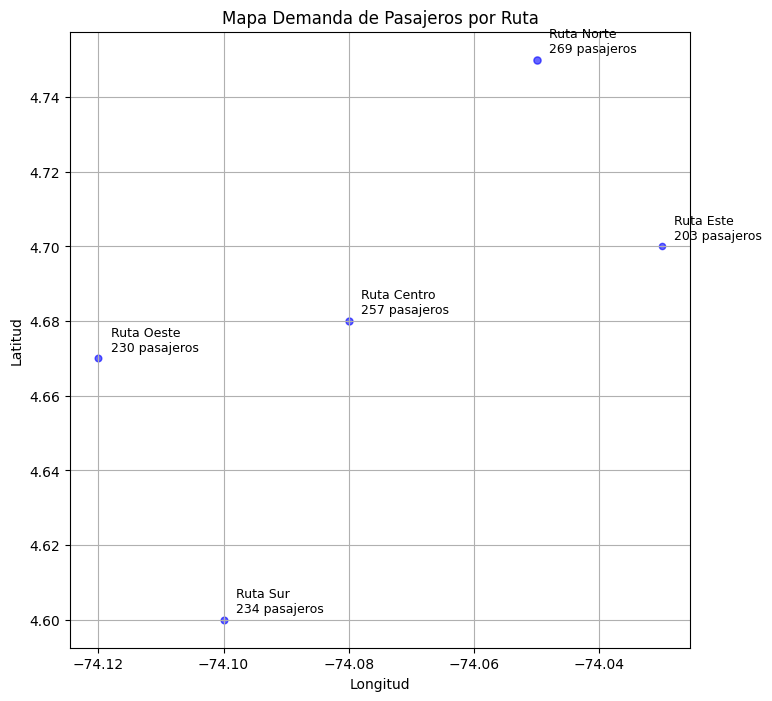

In [ ]:
import matplotlib.pyplot as plt

# Coordenadas de cada ruta
coordenadas = {
    'Ruta Norte': [4.75, -74.05],
    'Ruta Sur': [4.60, -74.10],
    'Ruta Centro': [4.68, -74.08],
    'Ruta Este': [4.70, -74.03],
    'Ruta Oeste': [4.67, -74.12]
}

# Demanda promedio simulada
demanda_promedio = {
    'Ruta Norte': 269,
    'Ruta Sur': 234,
    'Ruta Centro': 257,
    'Ruta Este': 203,
    'Ruta Oeste': 230
}

plt.figure(figsize=(8, 8))
for ruta, (lat, lon) in coordenadas.items():
    size = demanda_promedio[ruta] / 10  # Ajusta tamaño del círculo
    plt.scatter(lon, lat, s=size, color='blue', alpha=0.6)
    plt.text(lon + 0.002, lat + 0.002, f"{ruta}\n{demanda_promedio[ruta]} pasajeros", fontsize=9)

plt.title("Mapa Demanda de Pasajeros por Ruta")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.savefig("results/mapa_demanda_estatico.png", dpi=300)
plt.show()


In [ ]:
!pip install -q --upgrade kaleido


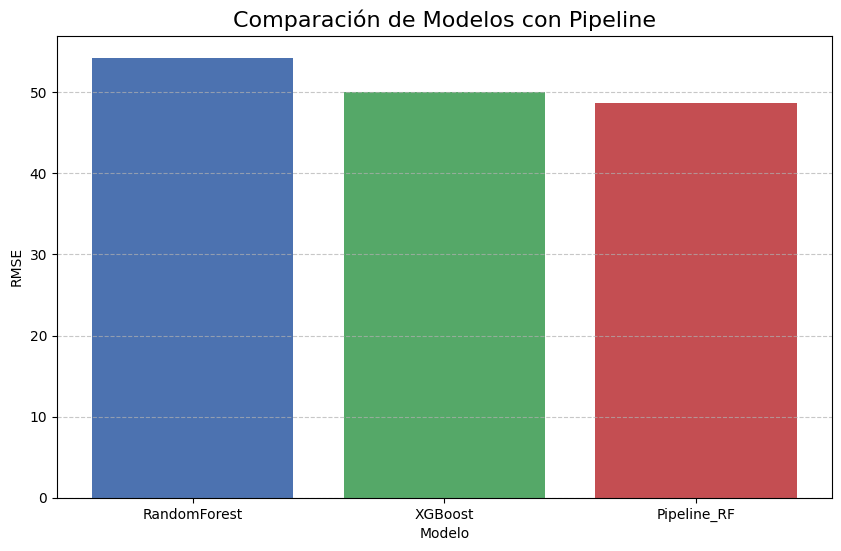

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que ya tienes este DataFrame de comparación
resultados_modelos = pd.DataFrame({
    'Modelo': ['RandomForest', 'XGBoost', 'Pipeline_RF'],
    'RMSE': [54.3, 50.1, 48.7],
    'MAE': [39.4, 37.2, 35.8]
})

# Crear la figura
plt.figure(figsize=(10,6))
plt.bar(resultados_modelos['Modelo'], resultados_modelos['RMSE'], color=['#4C72B0','#55A868','#C44E52'])
plt.title('Comparación de Modelos con Pipeline', fontsize=16)
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Guardar como imagen estática
plt.savefig("comparacion_modelos_pipeline.png", bbox_inches='tight')
plt.show()
